In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

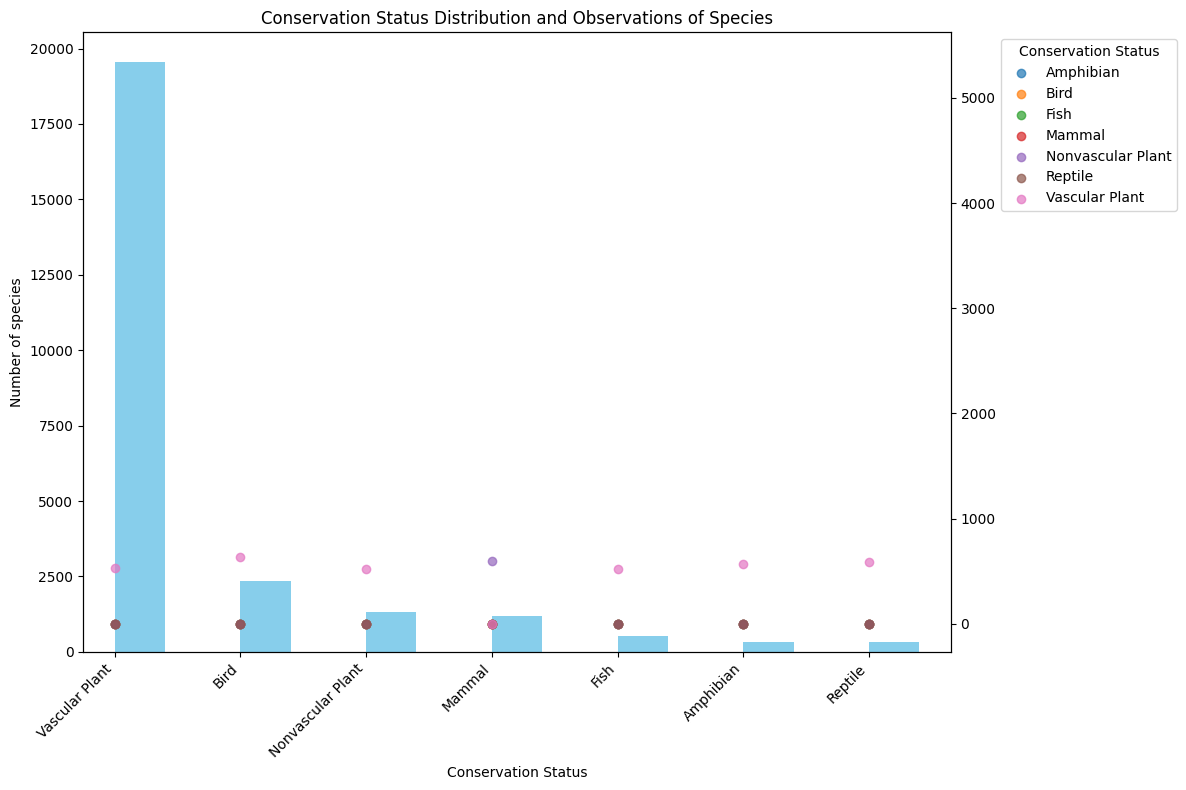

In [11]:
#loading datasets
observation_df = pd.read_csv("observations.csv")
species_info_df = pd.read_csv("species_info.csv")

#merging both files on scientific_name
merged_df = pd.merge(observation_df, species_info_df, how='inner', on='scientific_name')

#==============================================================
#Part 1: Distribution of conservation status
#getting the number of speices in each conservation category
category_counts = merged_df['category'].value_counts()
#==============================================================

#==============================================================
#Part 2: Observations and endagered species

#Grouping by species and conservation status, calculating total num of observations
species_conservation_status = merged_df.groupby(['scientific_name', 'category'])['observations'].sum().reset_index()

#pivot table for visualization
pivot_df = species_conservation_status.pivot_table(index='scientific_name', columns='category', values='observations', aggfunc='sum', fill_value=0)
#===============================================================

#===============================================================
#Combine plots


#figure for subplots
fig, ax1 = plt.subplots(figsize=(12,8))

#distribution of conversation status
category_counts.plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4)
ax1.set_title("Conservation Status Distribution and Observations of Species")
ax1.set_xlabel("Conservation Status")
ax1.set_ylabel("Number of species")
ax1.set_xticklabels(category_counts.index, rotation=45, ha='right')

#Creating another axis for observations by conservation status
ax2 = ax1.twinx()

#Plot the observation of species by conservation status as scatter points
for category in pivot_df.columns:
    ax2.scatter(pivot_df.index, pivot_df[category], label=category, alpha=0.7)

ax2.set_label('Total observations')
ax2.set_xlabel('Species')
ax2.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')

#adjusting to avoid overlap
plt.tight_layout()

#showing the plot
plt.show()
